In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

using RobustAssetAllocation
using Dates
using Plots

  Activating project at `~/Documents/RobustAssetAllocation.jl`


In [2]:
start_dt = Dates.Date(2010, 1, 1)
end_dt = Dates.Date(2014, 1, 1)

tickers = Vector{AbstractString}(["AMER3.SA", "ABEV3.SA", "ELET3.SA", "PETR4.SA", "VALE3.SA", "WEGE3.SA"])

portfolio = RobustAssetAllocation.Finance.Portfolio(tickers, start_dt, end_dt)

RobustAssetAllocation.Finance.Portfolio(RobustAssetAllocation.Finance.Asset[RobustAssetAllocation.Finance.Asset("AMER3.SA", [Date("2010-01-04"), Date("2010-01-05"), Date("2010-01-06"), Date("2010-01-07"), Date("2010-01-08"), Date("2010-01-11"), Date("2010-01-12"), Date("2010-01-13"), Date("2010-01-14"), Date("2010-01-15")  …  Date("2013-12-13"), Date("2013-12-16"), Date("2013-12-17"), Date("2013-12-18"), Date("2013-12-19"), Date("2013-12-20"), Date("2013-12-23"), Date("2013-12-26"), Date("2013-12-27"), Date("2013-12-30")], [40.92885534279349, 40.567110478062936, 39.55077523562467, 40.45513408235931, 40.30871756256414, 39.51632180330921, 38.49999159745052, 39.13735254740158, 38.99954473239443, 38.439695253835836  …  14.71476178752547, 14.653450521254532, 14.697243079729084, 14.977525659425053, 14.75855475120506, 14.34689339548201, 13.733778034797153, 13.646189581736191, 13.970264218052984, 14.189234617417105], [40.05894470214844, 38.78422279495108, 38.51721537764251, 38.59473014309172, 

In [8]:
mean_returns = collect(LinRange(0, maximum(portfolio.returns), 1000))

markowitz_model = RobustAssetAllocation.MarkowitzModel.MarkowitzModelData(portfolio.returns, portfolio.cov_matrix, mean_returns)

alloc, returns, covs = RobustAssetAllocation.MarkowitzModel.pareto_frontier(markowitz_model)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-03
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Thr

([[0.0004118501467366936, 0.3860315617989107, 0.07490245544094122, 0.17059872466768217, 0.08769976134665128, 0.28035564659908074], [0.0004111226572331198, 0.3860317623785578, 0.0749025814000348, 0.17059895900266486, 0.08769992875188323, 0.2803556458096237], [0.0004103956037126758, 0.3860319628378208, 0.07490270728392119, 0.17059919319609237, 0.08770009605818235, 0.2803556450202722], [0.00040966898580706854, 0.3860321631768064, 0.0749028330926563, 0.17059942724807736, 0.08770026326562785, 0.2803556442310224], [0.00040894280314487204, 0.3860323633956303, 0.07490295882630814, 0.17059966115873124, 0.08770043037430812, 0.28035564344188235], [0.00040821705535322526, 0.3860325634943906, 0.07490308448492675, 0.1705998949281717, 0.08770059738430933, 0.2803556426528426], [0.0004074917420567397, 0.38603276347321347, 0.07490321006858215, 0.17060012855653742, 0.08770076429570085, 0.28035564186392037], [0.0004067668628770192, 0.386032963332195, 0.07490333557733042, 0.17060036204391113, 0.08770093110

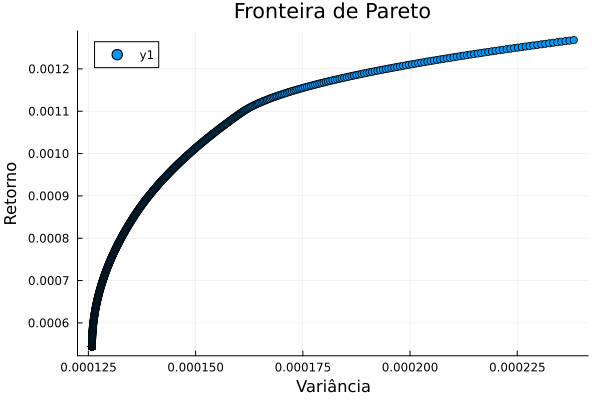

In [9]:
scatter(covs, returns; 
    title = "Fronteira de Pareto", 
    xlabel = "Variância",
    ylabel = "Retorno")